In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def euler_update(fx: callable, fv: callable , x0: np.array, v0: np.array, dt: float) -> tuple:

    dx = fx(x0, v0)
    dv = fv(x0, v0)

    new_x = x0 + dx * dt
    new_v = v0 + dv * dt

    return new_x, new_v

def rk4_update(fx: callable, fv: callable , x0: np.array, v0: np.array, dt: float) -> tuple:

    k1x = fx(x0, v0)
    k1v = fv(x0, v0)
    k2x = fx(x0 + 0.5 * dt * k1x, v0 + 0.5 * dt * k1v)
    k2v = fv(x0 + 0.5 * dt * k1x, v0 + 0.5 * dt * k1v)
    k3x = fx(x0 + 0.5 * dt * k2x, v0 + 0.5 * dt * k2v)
    k3v = fv(x0 + 0.5 * dt * k2x, v0 + 0.5 * dt * k2v)
    k4x = fx(x0 + dt * k3x, v0 + dt * k3v)
    k4v = fv(x0 + dt * k3x, v0 + dt * k3v)

    new_x = x0 + (1/6) * dt * (k1x + 2 * k2x + 2 * k3x + k4x)
    new_v = v0 + (1/6) * dt * (k1v + 2 * k2v + 2 * k3v + k4v)

    return new_x, new_v


In [141]:
def evolve(tmax, dt):
    num_iter = int(tmax / dt)

    x_euler = [1]
    y_euler = [0]

    x_rk4 = [1]
    y_rk4 = [0]

    for i in range(num_iter):
        old_x = x_euler[-1]
        old_y = y_euler[-1]
        new_x,new_y = euler_update(lambda x,y:-y, lambda x,y: x, old_x, old_y, dt)
        x_euler.append(new_x)
        y_euler.append(new_y)

    for i in range(num_iter):
        old_x = x_rk4[-1]
        old_y = y_rk4[-1]
        new_x,new_y = rk4_update(lambda x,y:-y, lambda x,y: x, old_x, old_y, dt)
        x_rk4.append(new_x)
        y_rk4.append(new_y)

    ham_euler = 0.5 * np.array(x_euler) ** 2 + 0.5 * np.array(y_euler) ** 2
    ham_rk4 = 0.5 * np.array(x_rk4) ** 2 + 0.5 * np.array(y_rk4) ** 2

    return x_euler, y_euler, x_rk4, y_rk4, ham_euler, ham_rk4


In [144]:
tmax = 4
energies_euler = []
energies_rk4 = []
dts = np.arange(0, 1.25, 0.25)
dts = dts[1:]
print(dts)

for dt in dts:
    _,_,_,_,euler,rk4 = evolve(tmax, dt)
    energies_euler.append(euler)
    energies_rk4.append(rk4)

tt = np.linspace(0, tmax, tmax * 500)
exact_y = np.sin(tt)
exact_x = np.cos(tt)

[0.25 0.5  0.75 1.  ]


Text(0, 0.5, 'Energy (Log Scale)')

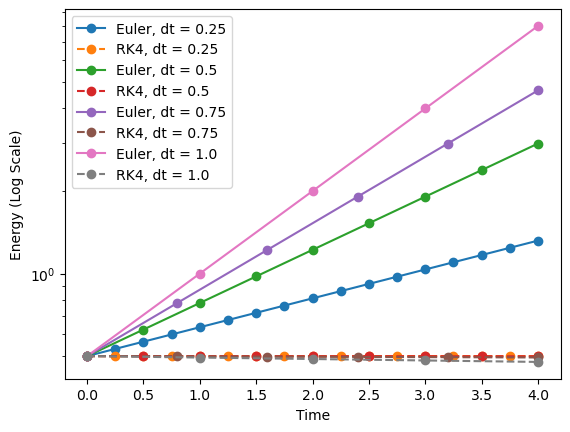

In [145]:

for i in range(len(energies_euler)):
    t = np.linspace(0, tmax, len(energies_euler[i]))
    plt.semilogy(t, energies_euler[i], marker="o", label="Euler, dt = {}".format(dts[i]))
    plt.semilogy(t, energies_rk4[i], marker="o" , linestyle='--', label="RK4, dt = {}".format(dts[i]))
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy (Log Scale)")


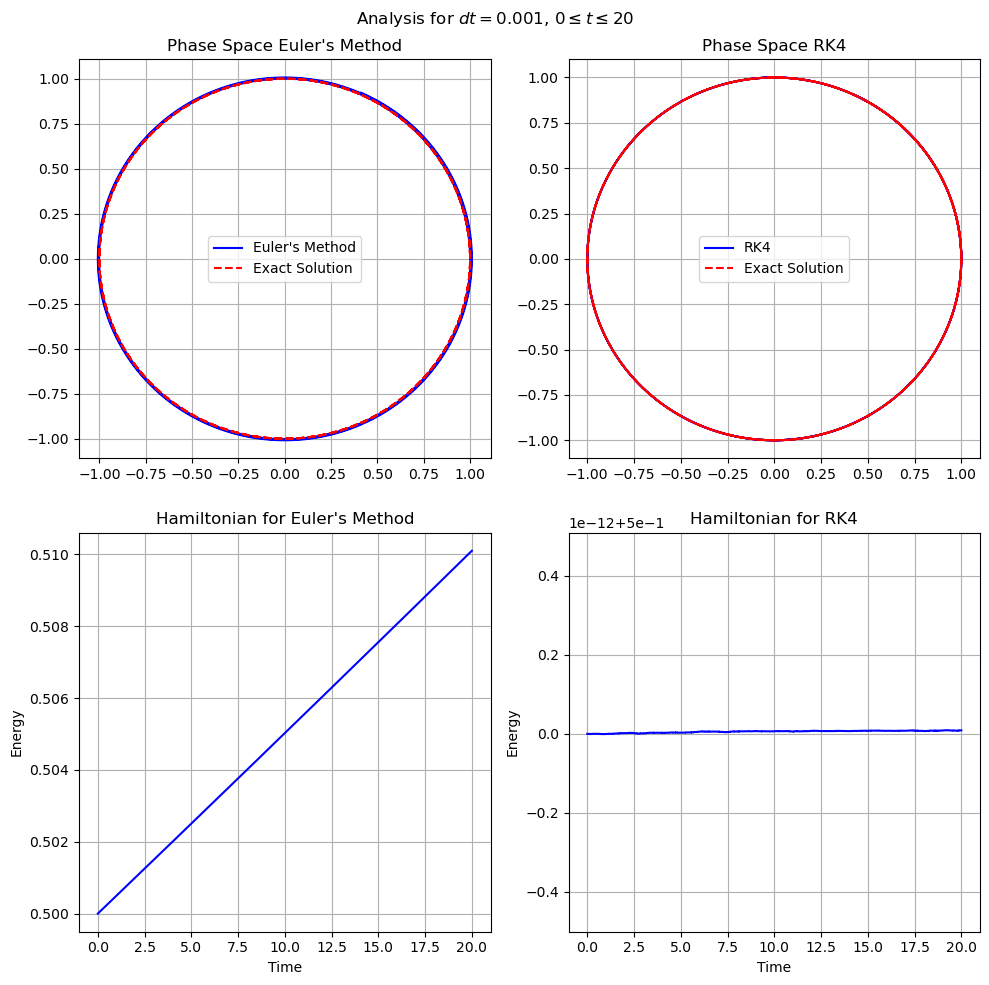

In [100]:
t = np.linspace(0, tmax, len(x_euler))
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle(r"Analysis for $dt = {}$, $0 \leq t \leq {}$".format(dt, tmax))

# Plot the first subplot
axes[0, 0].plot(x_euler, y_euler, color='blue', linestyle='-', label="Euler's Method")
axes[0, 0].plot(exact_x, exact_y, color='red', linestyle='--', label='Exact Solution')
axes[0, 0].set_title("Phase Space Euler's Method")
axes[0, 0].grid()
axes[0, 0].legend(fontsize=10)

# Plot the second subplot
axes[0, 1].plot(x_rk4, y_rk4, color='blue', linestyle='-', label='RK4')
axes[0, 1].plot(exact_x, exact_y, color='red', linestyle='--', label='Exact Solution')
axes[0, 1].set_title('Phase Space RK4')
axes[0, 1].grid()
axes[0, 1].legend(fontsize=10)

# Plot the third subplot
axes[1, 0].plot(t, ham_euler, color='blue')
axes[1, 0].set_title("Hamiltonian for Euler's Method")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Energy")
axes[1, 0].grid()

# Plot the third subplot
axes[1, 1].plot(t, ham_rk4, color='blue')
axes[1, 1].set_title("Hamiltonian for RK4")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Energy")
axes[1, 1].grid()

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()
fig.savefig("plots/dt{}.png".format(dt))